In [1]:
# Step 1: Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Step 2: Load the diabetes dataset
diabetes = load_diabetes(as_frame=True)
df = diabetes.frame  # pandas DataFrame
df.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.

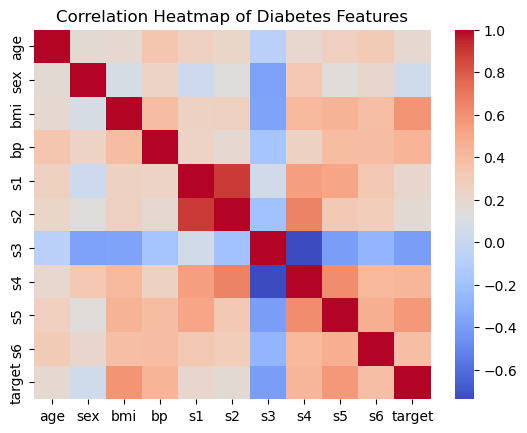

In [3]:
# Step 3: Data exploration
print(df.describe())
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap of Diabetes Features")
plt.show()


In [4]:
# Step 4: Split data
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [5]:
# Step 5: Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

Mean Squared Error: 2900.193628493482
R^2 Score: 0.45260276297191937


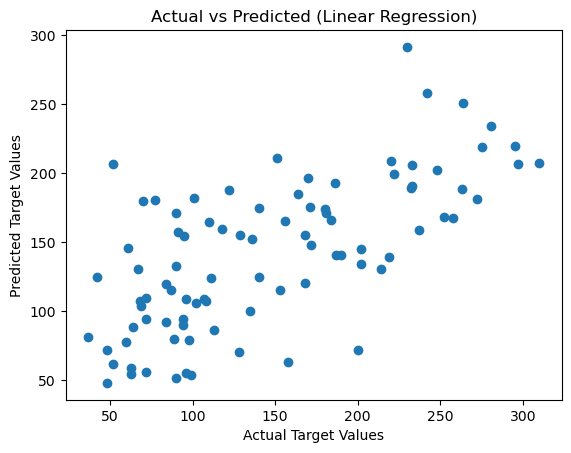

In [6]:
# Step 6: Evaluate model
y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

# Scatter plot actual vs predicted
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Target Values")
plt.ylabel("Predicted Target Values")
plt.title("Actual vs Predicted (Linear Regression)")
plt.show()


  Feature  Coefficient
8      s5   736.198859
2     bmi   542.428759
5      s2   518.062277
3      bp   347.703844
7      s4   275.317902
6      s3   163.419983
9      s6    48.670657
0     age    37.904021
1     sex  -241.964362
4      s1  -931.488846


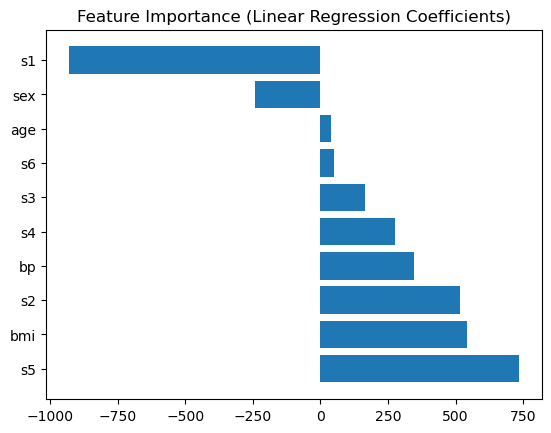

In [7]:
# Step 7: Feature importance (coefficients)
coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

print(coeff_df)

plt.barh(coeff_df["Feature"], coeff_df["Coefficient"])
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.show()


In [8]:
# Step 8: Cross-validation for model selection
cv_scores = cross_val_score(model, X, y, cv=5, scoring="r2")
print("Cross-validation R^2 scores:", cv_scores)
print("Average R^2:", np.mean(cv_scores))


Cross-validation R^2 scores: [0.42955615 0.52259939 0.48268054 0.42649776 0.55024834]
Average R^2: 0.48231643590864215
